In [109]:
# importando pacotes necessários para o desafio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import cm
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

## Missão: Analisar o Comportamento de Compra de Consumidores.

Você recebeu a tarefa de analisar os dados de compras de um web site! Os dados estão no formato JSON e disponíveis junto com este notebook.

No site, cada usuário efetua login usando sua conta pessoal e pode adquirir produtos à medida que navega pela lista de produtos oferecidos. Cada produto possui um valor de venda. Dados de idade e sexo de cada usuário foram coletados e estão fornecidos no arquivo JSON.

Seu trabalho é entregar uma análise de comportamento de compra dos consumidores. Esse é um tipo de atividade comum realizado por Cientistas de Dados e o resultado deste trabalho pode ser usado, por exemplo, para alimentar um modelo de Machine Learning e fazer previsões sobre comportamentos futuros.

Mas nesta missão você vai analisar o comportamento de compra dos consumidores usando o pacote Pandas da linguagem Python e seu relatório final deve incluir cada um dos seguintes itens:

** Contagem de Compradores **

* Número total de compradores


** Análise Geral de Compras **

* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total


** Informações Demográficas Por Gênero **

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados


** Análise de Compras Por Gênero **

* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária


** Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela): **

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares


** Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela): **

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos


** Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela): **

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra


** Como considerações finais: **

* Seu script deve funcionar para o conjunto de dados fornecido.
* Você deve usar a Biblioteca Pandas e o Jupyter Notebook.

In [110]:
df = pd.read_json('dados_compras.json')
df.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,164,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


In [111]:
# Número total de compradores
total_compradores = len(df['Login'].unique())
total_compradores

pd.DataFrame({'Total de Compradores': [total_compradores]})

,Total de Compradores
0,573


## Análise Geral de Compras

In [112]:
# Número de itens exclusivos
num_itens_exclusivos = len(df['Item ID'].unique())

# Preço Médio de Compra
preco_medio_compra = round(df['Valor'].mean(), 2)

# Numero Total de Compras
num_total_compra = df.shape[0]

# Rendimento Total
rendimento_total = round(df['Valor'].sum(), 2)

pd.DataFrame({'Numero Itens Exclusivos': num_itens_exclusivos, 
              'Preço Médio': [preco_medio_compra],
              'Numero Total': num_total_compra,
              'Redimento Total': rendimento_total})

,Numero Itens Exclusivos,Preço Médio,Numero Total,Redimento Total
0,183,2.93,780,2286.33


## Quantidade de Compras por Gênero

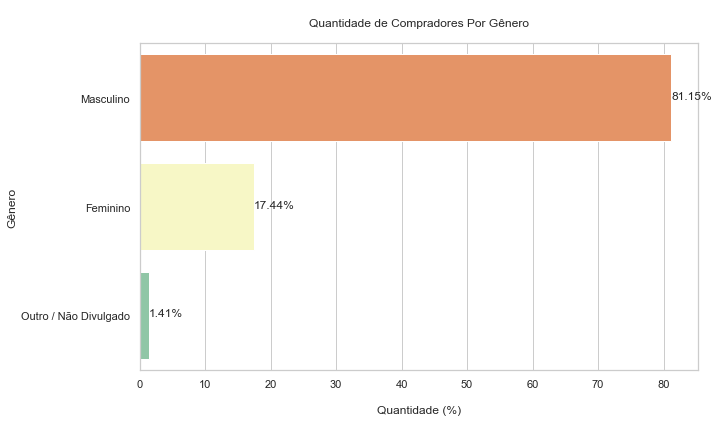

In [113]:
#Porcentagem e contagem de compradores masculinos
#Porcentagem e contagem de compradores do sexo feminino
#Porcentagem e contagem de outros / não divulgados
df_genero = df['Sexo'].value_counts().rename_axis('Sexo').reset_index(name='Count')
df_genero['Percentual'] = (df_genero['Count'] / df_genero['Count'].sum()) * 100

# Plot
plt.figure(figsize = (10,6))
sns.barplot(x = df_genero.Percentual, y = df_genero.Sexo, orient = "h", palette = "Spectral")
plt.ylabel('Gênero')             
plt.xlabel("\nQuantidade (%)")
plt.title('\nQuantidade de Compradores Por Gênero\n')

# Textos do gráfico
for i in range(len(df_genero.index)):
    plt.text(df_genero.Percentual[i], i + 0.01, str(round(df_genero.Percentual[i], 2)) + "%")

plt.show()

## Comportamento de Compras por Gênero

In [114]:
# Número de compras
dg_1 = df.groupby(['Sexo'], sort=False)['Valor'].count().reset_index(name='Qtd. Compra')

# Preço médio de compra
dg_2 = df.groupby(['Sexo'], sort=False)['Valor'].mean().reset_index(name='Média Compra')

# Valor Total de Compra
dg_3 = df.groupby(['Sexo'], sort=False)['Valor'].sum().reset_index(name='Total Compra')

df_genero = df_genero.merge(dg_1, on='Sexo')
df_genero = df_genero.merge(dg_2, on='Sexo')
df_genero = df_genero.merge(dg_3 , on='Sexo')

# Formatando Valores
df_genero['Percentual'] = df_genero['Percentual'].map("{:.2f}%".format)
# df_genero['Média Compra'] = df_genero['Média Compra'].map("{:.2f}".format)
# df_genero['Total Compra'] = df_genero['Total Compra'].map("{:.2f}".format)
# df_genero['Total Compra'] = df_genero['Total Compra'].astype(float)

# Dropando Coluna Redundante
df_genero.drop(columns=['Count'], inplace=True)

df_genero

,Sexo,Percentual,Qtd. Compra,Média Compra,Total Compra
0,Masculino,81.15%,633,2.950521,1867.68
1,Feminino,17.44%,136,2.815515,382.91
2,Outro / Não Divulgado,1.41%,11,3.249091,35.74


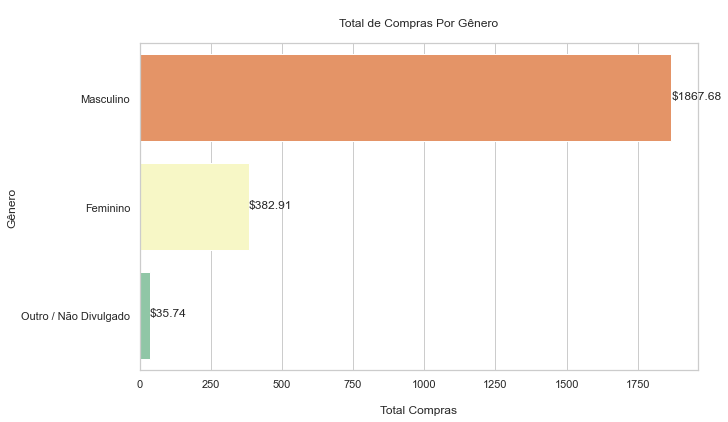

In [115]:
# Plot
plt.figure(figsize = (10,6))
sns.barplot(x = df_genero['Total Compra'], y = df_genero.Sexo, orient = "h", palette = "Spectral")
plt.ylabel('Gênero')             
plt.xlabel("\nTotal Compras")
plt.title('\nTotal de Compras Por Gênero\n')

# Textos do gráfico
for i in range(len(df_genero.index)):
    plt.text(df_genero['Total Compra'][i], i + 0.01, "$" + str(round(df_genero['Total Compra'][i], 2)))

plt.show()

## Comportamento de Compras por Faixa Etaria

In [116]:
# Compras por Faixa Etária

## Setando as Faixa Etárias por Compra
age_bins = [0, 9.99, 14.99, 19.99, 24.99, 29.99, 34.99, 39.99, 999]
age_bracket = ["Menos de 10", "10 a 14", "15 a 19", "20 a 24", "25 a 29", "30 a 34", "35 a 39", "Mais de 40"]
df["Range de Idades"] = pd.cut(df["Idade"], age_bins, labels=age_bracket)
df.head(5)

,Login,Idade,Sexo,Item ID,Nome do Item,Valor,Range de Idades
0,Aelalis34,38,Masculino,164,Bone Crushing Silver Skewer,3.37,35 a 39
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32,20 a 24
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46,30 a 34
3,Pheusrical25,21,Masculino,92,Final Critic,1.36,20 a 24
4,Aela59,23,Masculino,63,Stormfury Mace,1.27,20 a 24


In [117]:
# Número de compras
di_1 = df.groupby(['Range de Idades'], sort=False)['Valor'].count().reset_index(name='Qtd. Compra')

# Percentual
di_1['Percentual'] = (di_1['Qtd. Compra'] / di_1['Qtd. Compra'].sum()) * 100

# Preço médio de compra
di_2 = df.groupby(['Range de Idades'], sort=False)['Valor'].mean().reset_index(name='Média Compra')

# Valor Total de Compra
di_3 = df.groupby(['Range de Idades'], sort=False)['Valor'].sum().reset_index(name='Total Compra')

df_idade = di_1.merge(di_2, on='Range de Idades')
df_idade = df_idade.merge(di_3 , on='Range de Idades')

# Ordenando Colunas para Padronização da Exibição da Informação
df_idade = df_idade[['Range de Idades', 'Percentual', 'Qtd. Compra', 'Média Compra', 'Total Compra']]

# Formatando Valores
df_idade['Percentual'] = df_idade['Percentual'].map("{:.2f}%".format)
#df_idade['Média Compra'] = df_idade['Média Compra'].map("{:.2f}".format)
#df_idade['Total Compra'] = df_idade['Total Compra'].map("{:.2f}".format)

df_idade

,Range de Idades,Percentual,Qtd. Compra,Média Compra,Total Compra
0,Menos de 10,3.59%,28,2.980714,83.46
1,10 a 14,4.49%,35,2.770000,96.95
2,15 a 19,17.05%,133,2.905414,386.42
3,20 a 24,43.08%,336,2.913006,978.77
4,25 a 29,16.03%,125,2.962640,370.33
5,30 a 34,8.21%,64,3.082031,197.25
6,35 a 39,5.38%,42,2.842857,119.40
7,Mais de 40,2.18%,17,3.161765,53.75


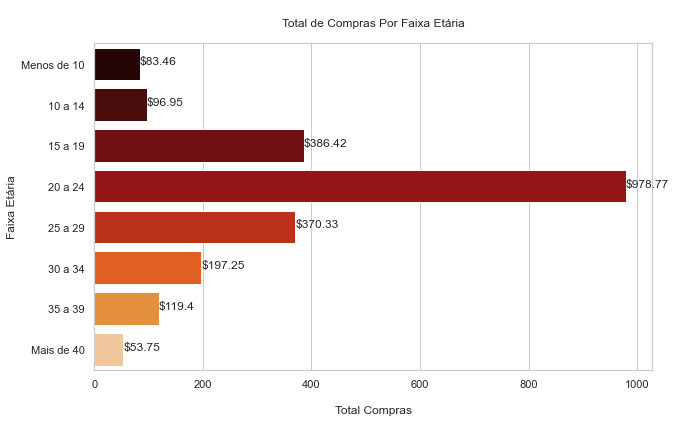

In [118]:
# Plot
plt.figure(figsize = (10,6))
sns.barplot(x = df_idade['Total Compra'], y = df_idade['Range de Idades'], orient = "h", palette = "gist_heat")
plt.ylabel('Faixa Etária')             
plt.xlabel("\nTotal Compras")
plt.title('\nTotal de Compras Por Faixa Etária\n')

# Textos do gráfico
for i in range(len(df_idade.index)):
    plt.text(df_idade['Total Compra'][i], i + 0.01, "$" + str(round(df_idade['Total Compra'][i], 2)))

plt.show()

## Melhores Compradores

In [119]:
total_compra = df.groupby(["Login"]).sum()["Valor"].rename("Total de Compra")
media_compra = df.groupby(["Login"]).mean()["Valor"].rename("Média de Compra")
qtd_compra = df.groupby(["Login"]).count()["Valor"].rename("Número de Compras")

# Dataframe para os resultados
df_usuario = pd.DataFrame({"Total de Compra": total_compra, 
                           "Média de Compra": media_compra, 
                           "Qtd. Compras": qtd_compra})

top_compradores = df_usuario.sort_values("Total de Compra", ascending=False).head(5)
top_compradores

,Total de Compra,Média de Compra,Qtd. Compras
Login,,,
Undirrala66,17.06,3.412000,5
Saedue76,13.56,3.390000,4
Mindimnya67,12.74,3.185000,4
Haellysu29,12.73,4.243333,3
Eoda93,11.58,3.860000,3


## Itens Mais Vendidos

In [122]:
itens = df.groupby(["Nome do Item"]).count()["Valor"].reset_index(name='Qtd. Compras')
pop_itens = itens.sort_values("Qtd. Compras", ascending=False).head(5)
pop_itens

,Nome do Item,Qtd. Compras
56,Final Critic,14
8,Arcane Gem,11
11,"Betrayal, Whisper of Grieving Widows",11
137,Stormcaller,10
173,Woeful Adamantite Claymore,9


## Itens mais Lucrativos

In [125]:
# Cálculos básicos
itens = df.groupby(["Nome do Item"]).sum()["Valor"].reset_index(name='Valor Total')
pop_itens_luc = itens.sort_values("Valor Total", ascending=False).head(5)
pop_itens_luc['Valor Total'] = pop_itens_luc['Valor Total'].map("${:.2f}".format)
pop_itens_luc

,Nome do Item,Valor Total
56,Final Critic,$38.60
112,Retribution Axe,$37.26
137,Stormcaller,$34.65
132,Spectral Diamond Doomblade,$29.75
96,Orenmir,$29.70
